# **Laboratorio 4:** Detector de Bordes Canny
**Programa:** [Bootcamp en Visión Artificial para los ODS](https://github.com/EdwinTSalcedo/Bootcamp-Computer-Vision-for-the-SDGs) - **Autor:** [Edwin Salcedo](https://github.com/EdwinTSalcedo)

En el laboratorio anterior aplicaste filtros de paso alto para acentuar características en una imagen o encontrar sus bordes. Esta vez, aplicaremos filtros de paso bajo que te permitirán suavizar la imagen para minimizar los elementos de alta frecuencia. En este laboratorio, trabajaras principalmente con imágenes ruidosas ya que estas implican desafíos al momento de mejorarlas. A continuación, veras la combinación de filtros de paso bajo y alto integrados al método de detección de bordes Canny. 

# Filtros de Paso Bajo

## 0. Importar librerias e imagen


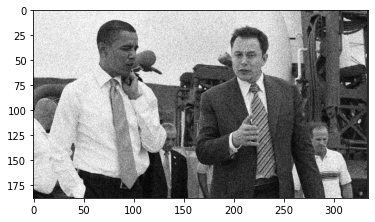

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Lectura de la imagen
image = mpimg.imread('elon.png')

# Conversión a escala de grises para filtrar
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap="gray")

## 1. Agregar ruido

Existen numerosas razones que pueden causar ruido en una imagen y lidiar con el ruido es un paso de preprocesamiento bastante común. Por lo tanto, lo agregaremos a la imagen y continuaremos este tutorial con una imagen ruidosa.



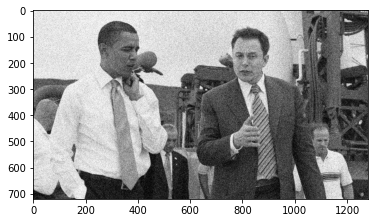

In [ ]:
# Scikit-image es parte de la conocida librería de aprendizaje automático Scikit-learn, 
# la cual incluye múltiples funciones de aprendizaje automático. Específicamente, Scikit-image
# tiene una colección de algoritmos para el procesamiento de imágenes. Está disponible de forma gratuita y
# libre de restricción. Sin embargo, al usar alguna de sus funciones, se sugiere investigar si su
# rendimiento/eficiencia es mejor a las implementaciones del mismo algoritmo en opencv, numpy u otras librerías.
from skimage.util import random_noise

# Agregar ruido gaussiano en la imagen con scikit-learn
# parámetros: una imagen, tipo de ruido (opciones: "gaussian", "pepper", "s&p"),
# Varianza de la distribución aleatoria
noise_img = random_noise(gray, mode='gaussian',var=0.02)
plt.imshow(noise_img, cmap="gray")

## 2. Filtro de la Media

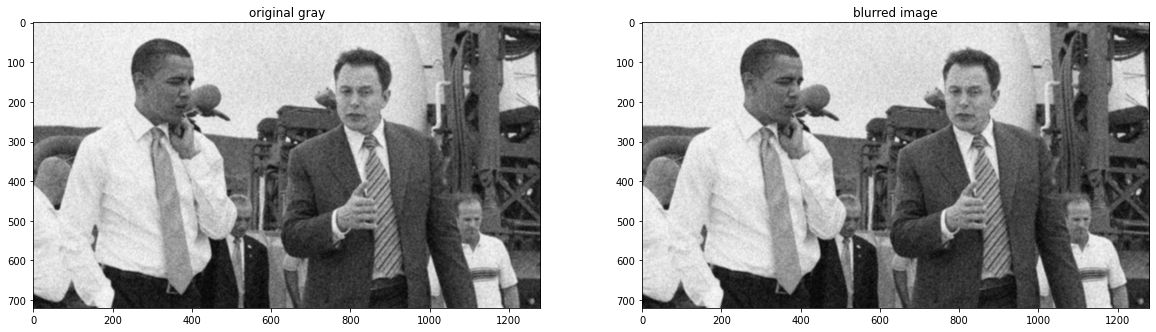

In [ ]:
copy = np.copy(noise_img)

# Crear el kernel 
num_rows, num_cols = 5 , 5
total = num_rows*num_cols
kernel = np.ones((num_rows,num_cols),np.float32)/total

# Convolucionar la imagen con el kernel
mean = cv2.filter2D(copy, -1, kernel)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(mean, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(mean, cmap='gray')

## 3. Filtrado de la mediana

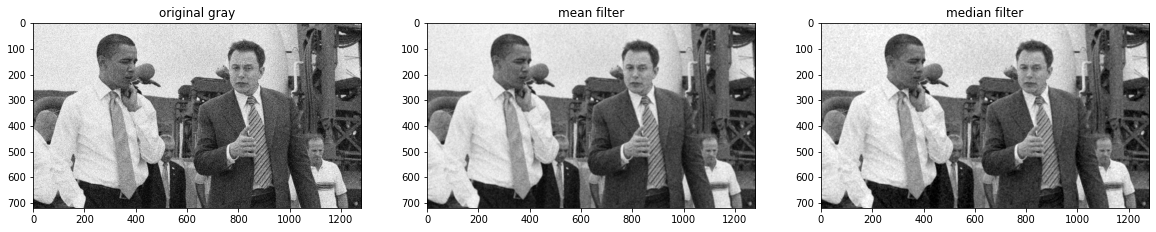

In [ ]:
copy2 = np.copy(noise_img)

# Aplicar filtro de la mediana
# Parámetros: imagen, tamaño del kernel
median = cv2.medianBlur(np.float32(copy2),5)

# Mostrar y comparar los resultados
f, (ax1, ax2, ax3) = plt.subplots(1 , 3, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(noise_img, cmap='gray')

ax2.set_title('mean filter')
ax2.imshow(mean, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(median, cmap='gray')

## 4. Filtro Gaussiano

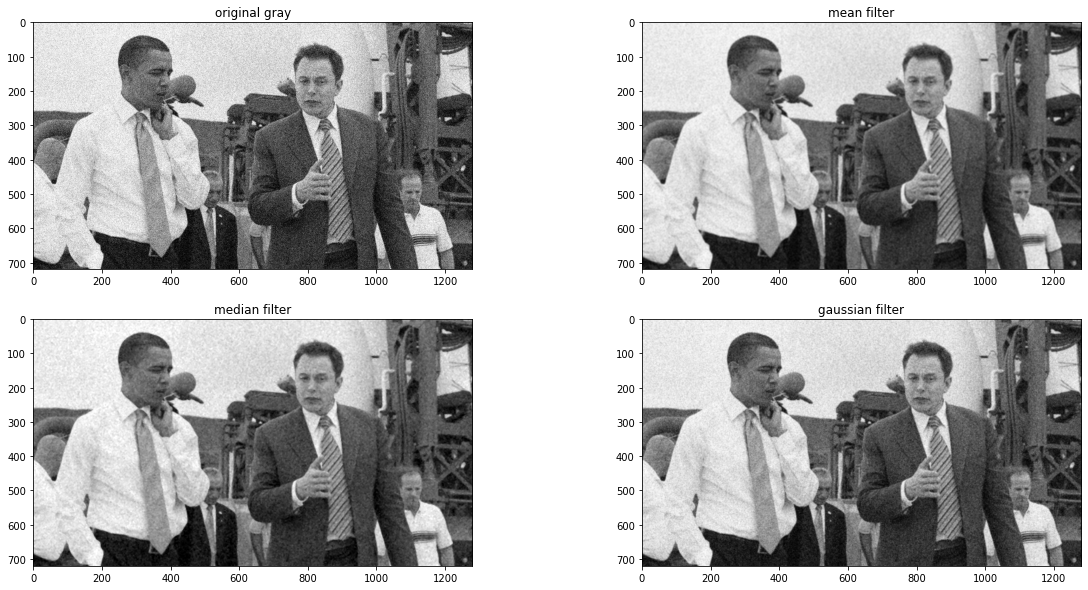

In [ ]:
copy3 = np.copy(noise_img)

# Aplicar filtro gaussiano con desviación estándar = 0
kernel_size = 5
# parámetros: imagen, dimensiones del núcleo, sigma x, sigma y
gaussian = cv2.GaussianBlur(copy3,(kernel_size,kernel_size),0,0)

# Mostrar los resultados
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2 , 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(noise_img, cmap='gray')

ax2.set_title('mean filter')
ax2.imshow(mean, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(median, cmap='gray')

ax4.set_title('gaussian filter')
ax4.imshow(gaussian, cmap='gray')

## 5. Filtrado Bilateral

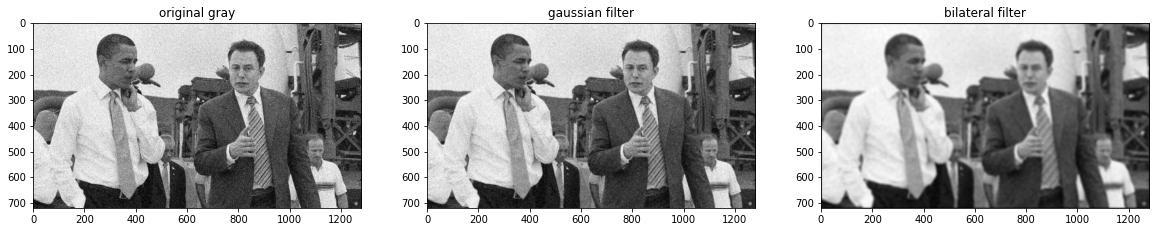

In [ ]:
copy4 = np.copy(noise_img)

# Aplicar filtrado bilateral
# parámetros: imagen en formato float32, tamaño del kernel, desviación estándar (sigmaColor) para las intensidades en
# base a la distribución gaussiana, desviación estándar (sigmaPixel) para la diferencia entre coordenadas en base a la
# distribución gaussiana, tipo de borde utilizado para extrapolar píxeles fuera de la imagen (Padding). 
# Para ver mas opciones de tipos de metodos de extrapolación, ver el siguiente link:
# https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/enum_cv_BorderTypes.html

bilateral = cv2.bilateralFilter(np.float32(copy4),15,75,75, borderType=cv2.BORDER_CONSTANT)

f, (ax1, ax2, ax3) = plt.subplots(1 , 3, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(copy4, cmap='gray')

ax2.set_title('gaussian filter')
ax2.imshow(gaussian, cmap='gray')

ax3.set_title('bilateral filter')
ax3.imshow(bilateral, cmap='gray')

## **Ejercicio 1:** Filtros de paso bajo
Cuanto más reciente sea el método, mejores serán los resultados del filtrado de paso bajo. Ahora, es tu turno de implementar los siguientes filtros desde cero. Para este ejercicio, puedes utilizar la función de filtrado que creaste en el último laboratorio.

- Filtro de la media
- Filtro de la mediana 
- Filtro gaussiano (puedes usar kernels con valores constantes)

Para probar tus metodos, deberas utiizar imágenes con ruido en escala de grises.

# 6. Canny Edge Detection

El detector de bordes Canny es un método de detección de bordes que utiliza un algoritmo de varias etapas para detectar bordes normalizados y relevantes. Fue desarrollado por John F. Canny en 1986 y es ampliamente utilizado por los profesionales de la visión por computadora debido a su eficiencia en la eliminación de ruido, detección y estandarización de bordes. Por otro lado, hay muchos métodos que surgieron en años posteriores, pero solo unos pocos son los conocidos como Canny Edge Detector.

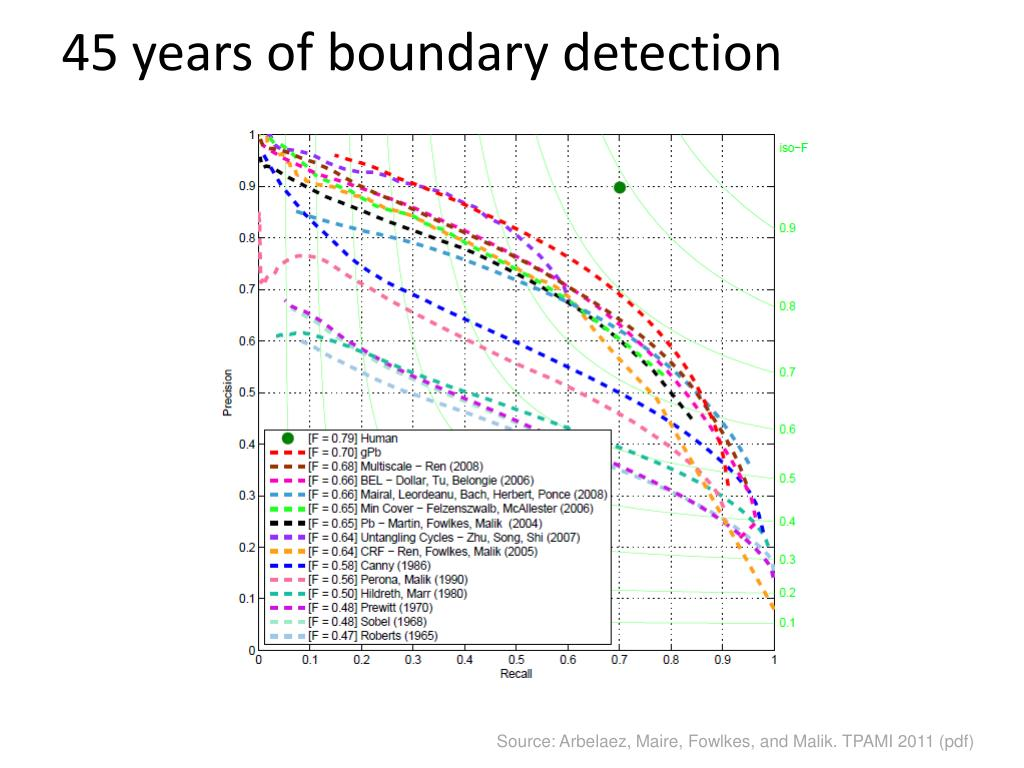

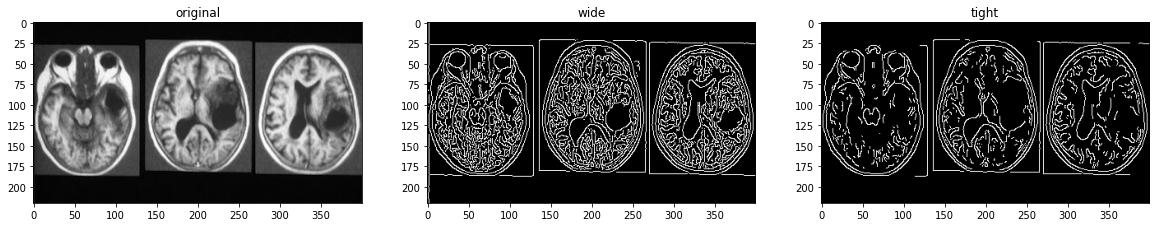

In [ ]:
# Lectura de la imagen
image = cv2.imread('brain_ct.jpeg',0)

# Aplicar Canny usando umbrales amplios y estrechos

wide = cv2.Canny(image, 30, 100)
tight = cv2.Canny(image, 200, 240)
    
# Mostrar resultados
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('original')
ax1.imshow(image, cmap='gray')
ax2.set_title('wide')
ax2.imshow(wide, cmap='gray')
ax3.set_title('tight')
ax3.imshow(tight, cmap='gray')

## **Ejercicio 2:** Procesamiento de Imágenes Médicas

Un médico diagnosticó a un paciente con un tumor benigno, el cual requiria una cirugía urgente para evitar que empeorara. Después, la cirugía se completó con éxito y se le solicitó al paciente que se realizara exámenes de tomografía computarizada todos los meses. El primer examen estuvo bien pero, lamentablemente, el equipo de análisis de imágenes computarizado se averio.

¿Puedes darles una mano?
Limpia la imagen y detecta los bordes. Al final, deberías obtener dos imagenes separadas, una con el examen anterior y otra imagen con el nuevo examen. Ambas imágenes deben estar binarizadas y solo con bordes.

No es necesario que diagnostiques la imagen todavía (es decir, identificar automáticamente si el paciente ha mejorado), pero puedes ayudar mostrando la ubicación del tumor en la muestra anterior. **Pista:** Puede usar cv.rectangle() o cv.circle() para marcar rectángulos y círculos en una imagen, respectivamente.

Deberas trabajar con la siguiente imagen: https://drive.google.com/file/d/1pV8_cUtI70tNNTL-o-ZPyK-tU0fOwv3t/view?usp=sharing 

## **Ejercicio 3:** Encuentra las gradientes

Encontrar las gradientes (bordes de una imagen) es un paso esencial del detector Canny. En este ejercicio deberas procesar una imagen y encontrar la magnitud y orientación de la gradiente por cada pixel. Tu método debería devolver dos imágenes resultantes (similares a la imagen ejemplo) despues de extraer las gradientes. Finalmente, deberas encontrar, filtrar y mostrar a todos los gradientes que esten apuntando al norte en una tercera imagen.

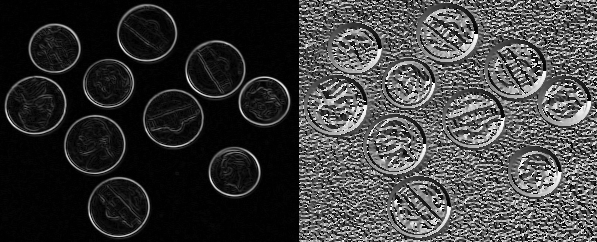

# Contribución

Puedes usar esta sección en el caso de que las contribuciones en tu equipo hayan sido variadas. Si ese es el caso, deberas anotar los nombres de tu equipo y su contribución. 

Ejemplo: 
- << nombre >> << apellido >> (25%)
- << nombre >> << apellido >> (25%)
- << nombre >> << apellido >> (25%)
- << nombre >> << apellido >> (25%)

Deberá sumar 100% entre todas las contribuciones. Puedes borrar esta sección si todos los miembros de equipo contribuyeron por igual.  